In [1]:
import pandas as pd
import numpy as np

In [5]:
tads_df = pd.read_csv("TADS.csv", header=0)
tads_df.head()

,TAD_name,start,end
0,TAD1,58550000,59800000
1,TAD2,59850000,60450000


In [8]:
genomic_bin_matrix = np.loadtxt("genomic_bins.tsv", delimiter="\t", dtype=float)
genomic_bin_matrix

array([58200000., 58250000., 58300000., 58350000., 58400000., 58450000.,
       58500000., 58550000., 58600000., 58650000., 58700000., 58750000.,
       58800000., 58850000., 58900000., 58950000., 59000000., 59050000.,
       59100000., 59150000., 59200000., 59250000., 59300000., 59350000.,
       59400000., 59450000., 59500000., 59550000., 59600000., 59650000.,
       59700000., 59750000., 59800000., 59850000., 59900000., 59950000.,
       60000000., 60050000., 60100000., 60150000., 60200000., 60250000.,
       60300000., 60350000., 60400000., 60450000., 60500000., 60550000.,
       60600000., 60650000., 60700000., 60750000., 60800000., 60850000.,
       60900000., 60950000.])

In [9]:
gm_matrix = np.loadtxt("matrix_gm.tsv", delimiter="\t", dtype=float)
gm_matrix

array([[25453.462891,  7385.57666 ,  3864.000732, ...,    98.430588,
          110.254509,   109.298737],
       [ 7385.57666 , 22676.990234,  6818.535156, ...,   124.43158 ,
          101.644928,   113.254982],
       [ 3864.000732,  6818.535156, 21942.046875, ...,   142.914429,
          174.053329,   129.45993 ],
       ...,
       [   98.430588,   124.43158 ,   142.914429, ..., 25989.181641,
         9879.811523,  6936.487793],
       [  110.254509,   101.644928,   174.053329, ...,  9879.811523,
        28731.753906,  9020.      ],
       [  109.298737,   113.254982,   129.45993 , ...,  6936.487793,
         9020.      , 22873.777344]])

In [10]:
k562_matrix = np.loadtxt("matrix_k562.tsv", delimiter="\t", dtype=float)
k562_matrix

array([[4908.682129, 1742.478638,  926.546997, ...,    9.351448,
           8.802203,    8.167011],
       [1742.478638, 4503.131348, 1641.403198, ...,   11.268626,
          13.499537,    7.828358],
       [ 926.546997, 1641.403198, 4285.756836, ...,    9.118051,
           6.675289,   10.064569],
       ...,
       [   9.351448,   11.268626,    9.118051, ..., 5544.295898,
        2241.30835 , 1217.54895 ],
       [   8.802203,   13.499537,    6.675289, ..., 2241.30835 ,
        6405.023438, 1906.459229],
       [   8.167011,    7.828358,   10.064569, ..., 1217.54895 ,
        1906.459229, 4465.26123 ]])

In [15]:
tad_list: list = tads_df.to_dict(orient="records")
tad_list

[{'TAD_name': 'TAD1', 'start': 58550000, 'end': 59800000},
 {'TAD_name': 'TAD2', 'start': 59850000, 'end': 60450000}]

In [16]:
tad_list[0].values()

dict_values(['TAD1', 58550000, 59800000])

In [17]:
tad_dict = {}
for row in tad_list:
    row_values = list(row.values())
    tad_dict[row_values[0]] = tuple(row_values[1:])
tad_dict

{'TAD1': (58550000, 59800000), 'TAD2': (59850000, 60450000)}

In [56]:
tad1_bins: list = []
tad2_bins: list = []
tad1_labels: list = []
tad2_labels: list = []
for index, genomic_bin in enumerate(genomic_bin_matrix):
    tad1_intervals: tuple = tad_dict["TAD1"]
    tad2_intervals: tuple = tad_dict["TAD2"]
    if genomic_bin >= tad1_intervals[0] and genomic_bin <= tad1_intervals[1]:
        tad1_bins.append(index)
        tad1_labels.append(genomic_bin)
    elif genomic_bin >= tad2_intervals[0] and genomic_bin <= tad2_intervals[1]:
        tad2_bins.append(index)
        tad2_labels.append(genomic_bin)
    else:
        continue

In [30]:
print(tad1_bins)
print(tad2_bins)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [28]:
print(len(tad1_bins))
print(len(tad2_bins))

26
13


In [32]:
tad1_genomic_bin_data_indices: tuple = tuple((min(tad1_bins), max(tad1_bins)))
tad2_genomic_bin_data_indices: tuple = tuple((min(tad2_bins), max(tad2_bins)))

In [33]:
print(tad1_genomic_bin_data_indices)
print(tad2_genomic_bin_data_indices)

(7, 32)
(33, 45)


In [38]:
tad1_k562_data = []

tad1_lower_bound = tad1_genomic_bin_data_indices[0]
tad1_upper_bound = tad1_genomic_bin_data_indices[1]

k562_reshape = pd.DataFrame(k562_matrix)
tad1_k562_data = k562_reshape.loc[tad1_lower_bound : tad1_upper_bound + 1].to_numpy()
tad1_k562_data

array([[223.319   , 229.085495, 309.554047, ...,   7.131474,  13.052311,
         12.71594 ],
       [179.06369 , 221.738541, 276.179199, ...,  21.391825,  18.152372,
          8.91659 ],
       [174.283981, 162.880676, 203.419418, ...,  15.319863,  14.420073,
         16.724348],
       ...,
       [ 82.191086,  96.87384 ,  87.724968, ...,  20.795013,  17.462765,
         16.825779],
       [ 62.583744,  71.986374,  85.430458, ...,  22.633589,  20.712452,
         22.100451],
       [ 83.434044,  81.522255,  88.787025, ...,  20.54871 ,  23.753099,
         21.488033]])

In [39]:
import matplotlib.pyplot as plt

In [40]:
np.percentile(tad1_k562_data, 95)

283.508423

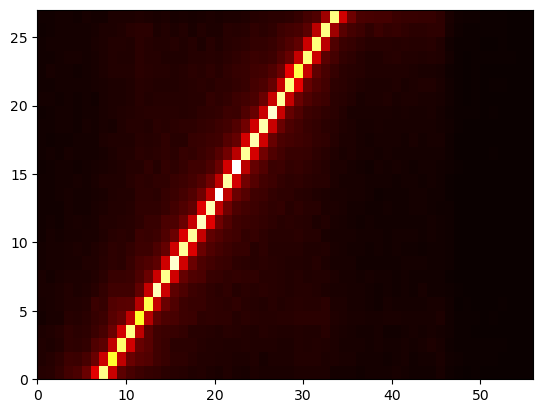

In [43]:
plt.pcolormesh(tad1_k562_data, cmap="hot",)
plt.show()

In [57]:
tad1_labels

[58550000.0,
 58600000.0,
 58650000.0,
 58700000.0,
 58750000.0,
 58800000.0,
 58850000.0,
 58900000.0,
 58950000.0,
 59000000.0,
 59050000.0,
 59100000.0,
 59150000.0,
 59200000.0,
 59250000.0,
 59300000.0,
 59350000.0,
 59400000.0,
 59450000.0,
 59500000.0,
 59550000.0,
 59600000.0,
 59650000.0,
 59700000.0,
 59750000.0,
 59800000.0]

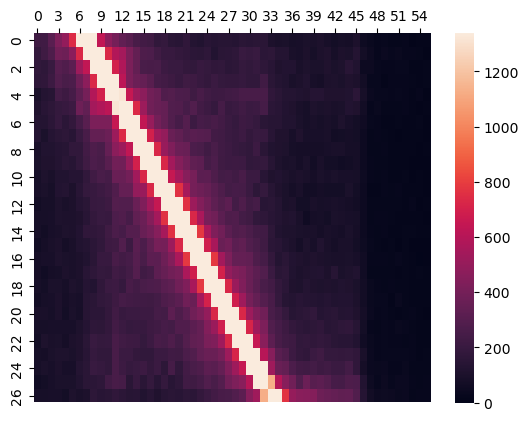

In [62]:
ax = sns.heatmap(tad1_k562_data, vmin=0, vmax=np.percentile(tad1_k562_data, 95))
ax.xaxis.tick_top()